In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

def color_func(x): return np.abs(0.5 - x) + 0.5

def plot_beating(f1, f2, ramp_freq_perc, pure_blend_perc, T=10, fs=1000):
    t = np.linspace(0, T, T * fs)

    pure_freq_perc = 1.0 - (2 * ramp_freq_perc + pure_blend_perc)

    # Compute region boundaries
    r1 = pure_freq_perc / 2 * T
    r2 = r1 + ramp_freq_perc * T
    r3 = r2 + pure_blend_perc * T
    r4 = r3 + ramp_freq_perc * T

    # Define blend factor based on time
    xs = [e * fs for e in [0, r1, r2, r3, r4, T]]
    ys = [0, 0, 0.5, 0.5, 1, 1]
    blend_factor = np.interp(range(T * fs), xs, ys)

    # Generate blended signal
    signal = (1 - blend_factor) * np.sin(2 * np.pi * f1 * t) + blend_factor * np.sin(2 * np.pi * f2 * t)

    # Normalize for better visualization
    signal /= np.max(np.abs(signal))

    # Compute the envelope using Hilbert transform
    analytic_signal = hilbert(signal)
    envelope = np.abs(analytic_signal)

    # Create figure
    plt.figure(figsize=(16, 0.5))

    # Smooth shading using blend factor
    color_blend = [color_func(e) for e in blend_factor]
    color_shading = np.column_stack((color_blend,color_blend,color_blend))
    for i in range(len(t) - 1):  # Fill shading per segment
        plt.fill_between(t[i:i+2], -envelope[i:i+2], envelope[i:i+2], color=color_shading[i], alpha=0.2)

    # Plot the signal
    plt.plot(t, signal, 'black', label="Signal")

    # Add labels and legend
    plt.xticks([])
    plt.yticks([])
    plt.xlim(0, T)
    ax = plt.gca()  # Get the current axes
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.show()

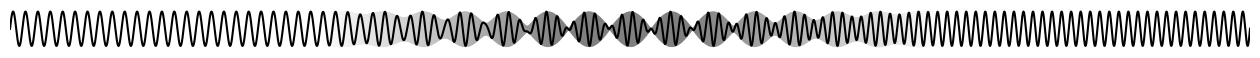

In [2]:
##################
# set parameters #
##################

f1 = 10  # Hz (left signal)
f2 = 13  # Hz (right signal)

# Define region proportions
ramp_freq_perc = 0.2  # one-sided
pure_blend_perc = 0.1

plot_beating(f1, f2, ramp_freq_perc, pure_blend_perc)